# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pylab
%matplotlib inline

np.random.seed(8080)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
#df.head()


### Q1: Is the distribution of body temperature normal?

The distribution is approximately normal based on the histogram and ECDF plots, Figures 1 and 2 below, respectively.

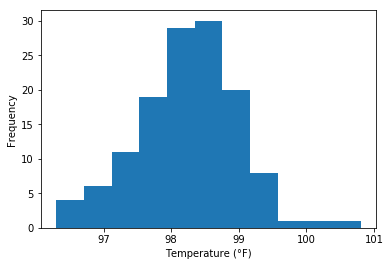

In [4]:
# Plot Histogram

body_temp = df.temperature

# Set bins to sqrt of the sample size
n_bins = int(np.sqrt(len(body_temp)))

_ = df.temperature.plot(kind='hist', bins=n_bins)
_ = plt.xlabel('Temperature (°F)')

Figure 1. Body Temperatures

In [5]:
# Calculate the ECDF
x_exp, y_exp = ecdf(body_temp)

temp_random = np.random.normal(np.mean(body_temp), np.std(body_temp), 10000)
x_rand, y_rand = ecdf(temp_random)

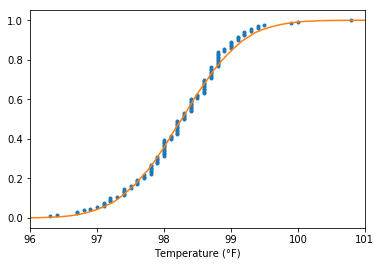

In [6]:
# Plot the ECDF
_ = plt.plot(x_exp, y_exp, marker='.', linestyle='none')
_ = plt.plot(x_rand, y_rand)
_ = plt.xlim([96,101])
_ = plt.xlabel('Temperature (°F)')

Figure 2. CDF of Body Temperatures.

### Q2: Is the sample size large? Are the observations independent?

The sample size (n = 130) is large enough to apply the Central Limit Theorem, considering that the sample size is larger than 30 and the distribution is approximately normal.
The observations can be considered independent, assuming that the data for one person's measured temperature does not affect the temperature of another person in the sample.

In [7]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### Q3: Is the true population mean really 98.6 degrees F?

We will test the following:

* **H<sub>0</sub>**: x̅ = 98.6 °F

* **H<sub>a</sub>**: x̅ $\neq$ 98.6 °F

Hypothesis testing using a bootstrap method for 10,000 samples, the p-value equals 0.0. This indicates that we should reject the null hypothesis that the population mean equals 98.6 °F. In this sample, the mean temperature equals 98.2 °F.

A one-sample, t-test should be used, since the data is for one sample being compared to a population mean. The z-statistic will not be used, since it requires a known standard deviation of the population.

The statistics for the t-test show:

t-score = -5.45

p-value = 0.00

In [8]:
np.mean(body_temp)

bs_replicates = np.empty(10000)

size = len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(body_temp, len(body_temp))
    bs_replicates[i] = np.mean(bs_sample)
    
bs_rep_p = np.sum(bs_replicates >= 98.6) / size
bs_rep_mean = np.mean(bs_replicates)
bs_rep_std = np.std(bs_replicates)
print(bs_rep_p)
print(bs_rep_mean)

stats.ttest_1samp(body_temp, 98.6)

0.0
98.24988976923076


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### Q4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [9]:
temp_sample = np.random.choice(body_temp, 10)

In [17]:
temp_stat = stats.ttest_1samp(temp_sample, 98.6)
print("t-score =", temp_stat[0])
print("p-value =", temp_stat[1])

t-score = -0.5267415375672739
p-value = 0.6111072863683706


Since the population std is unknown, only the t-test should be calculated. From Question 3, the "population" mean from the bootstrap method appears to be affected by systematic error.

Since the p-value, 0.61, is greater than 0.05, the null hypothesis cannot be rejected.


### Q5: At what temperature should we consider someone's temperature to be "abnormal"?

In [19]:
body_temp_stats = body_temp.describe()

In [46]:
ci = stats.norm.interval(0.95, loc=bs_rep_mean, scale=bs_rep_std)
moe = ci[1] - body_temp_stats['mean']
print('mean = {:0.5} '.format(body_temp_stats['mean']))
print('95% confidence interval: [{:0.5}, {:0.5}]'.format(ci[0], ci[1]))
print('margin of error: ±{:0.3f}'.format(moe))

mean = 98.249 
95% confidence interval: [98.124, 98.376]
margin of error: ±0.127


Using a 95% confidence interval, an abnormal temperature could be considered to be any temperature outside of the range of \[98.124, 98.376\].

### Q6: Is there a significant difference between males and females in normal temperature?

In [67]:
df_male = df[df.gender == 'M']
df_female = df[df.gender == 'F']


# T-test to check if two-samples have equal means
sex_ttest = stats.ttest_ind(df_male.temperature, df_female.temperature, equal_var=False)

In [74]:
male_stats = df_male.temperature.describe()
print('Male Stats')
print('mean = {:0.5}'.format(male_stats[1]))
print('std = {:0.3}\n'.format(male_stats[2]))

fem_stats = df_female.temperature.describe()
print('Female Stats')
print('mean = {:0.5}'.format(fem_stats[1]))
print('std = {:0.3}\n'.format(fem_stats[2]))

print('t-score: {:.2f}'.format(sex_ttest[0]))
print('p-value: {:.2f}'.format(sex_ttest[1]))

Male Stats
mean = 98.105
std = 0.699

Female Stats
mean = 98.394
std = 0.743

t-score: -2.29
p-value: 0.02


Based on the p-value, 0.02, of the t-test, we should reject the null hypothesis and conclude that there is a significant difference between the mean male and mean female body temperatures, which are 98.1 and 98.4, respectively. 

From this dataset, the calculated population mean of 98.2 does differ from the proposed mean of 98.6. Additional information about the dataset was not provided, so based on the analysis, there is still room for error based on sampling biases other systematic errors.